<a href="https://colab.research.google.com/github/jfink09/Financial-Modeling/blob/Machine-Learning/ML_to_Buy_Sell_Hold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install libraries
!pip install -q yfinance
!pip install -q fix-yahoo-finance


# Import libraries
import warnings
warnings.filterwarnings('ignore')  # Hide warnings

import bs4 as bs
import datetime as dt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure
from pandas_datareader import data as pdr
import pickle 
import requests
import fix_yahoo_finance as yf

style.use('ggplot')

yf.pdr_override()

In [8]:
# Download Tesla stock data
TSLA = yf.download('TSLA', start='2000-01-01', end='2020-07-24', progress=False)
TSLA.reset_index(inplace=True)
TSLA.set_index("Date", inplace=True)
#TSLA = TSLA.drop("Volume", axis=1)

# See first five trading days
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [9]:
# See last five trading days
TSLA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-17,1513.449951,1537.510010,1490.00000,1500.839966,1500.839966,9330000
2020-07-20,1519.010010,1650.000000,1488.00000,1643.000000,1643.000000,17121400
2020-07-21,1639.930054,1675.000000,1558.00000,1568.359985,1568.359985,16157300
2020-07-22,1599.000000,1626.420044,1562.00000,1592.329956,1592.329956,14161100
2020-07-23,1678.949951,1689.000000,1480.77002,1513.069946,1513.069946,24328500


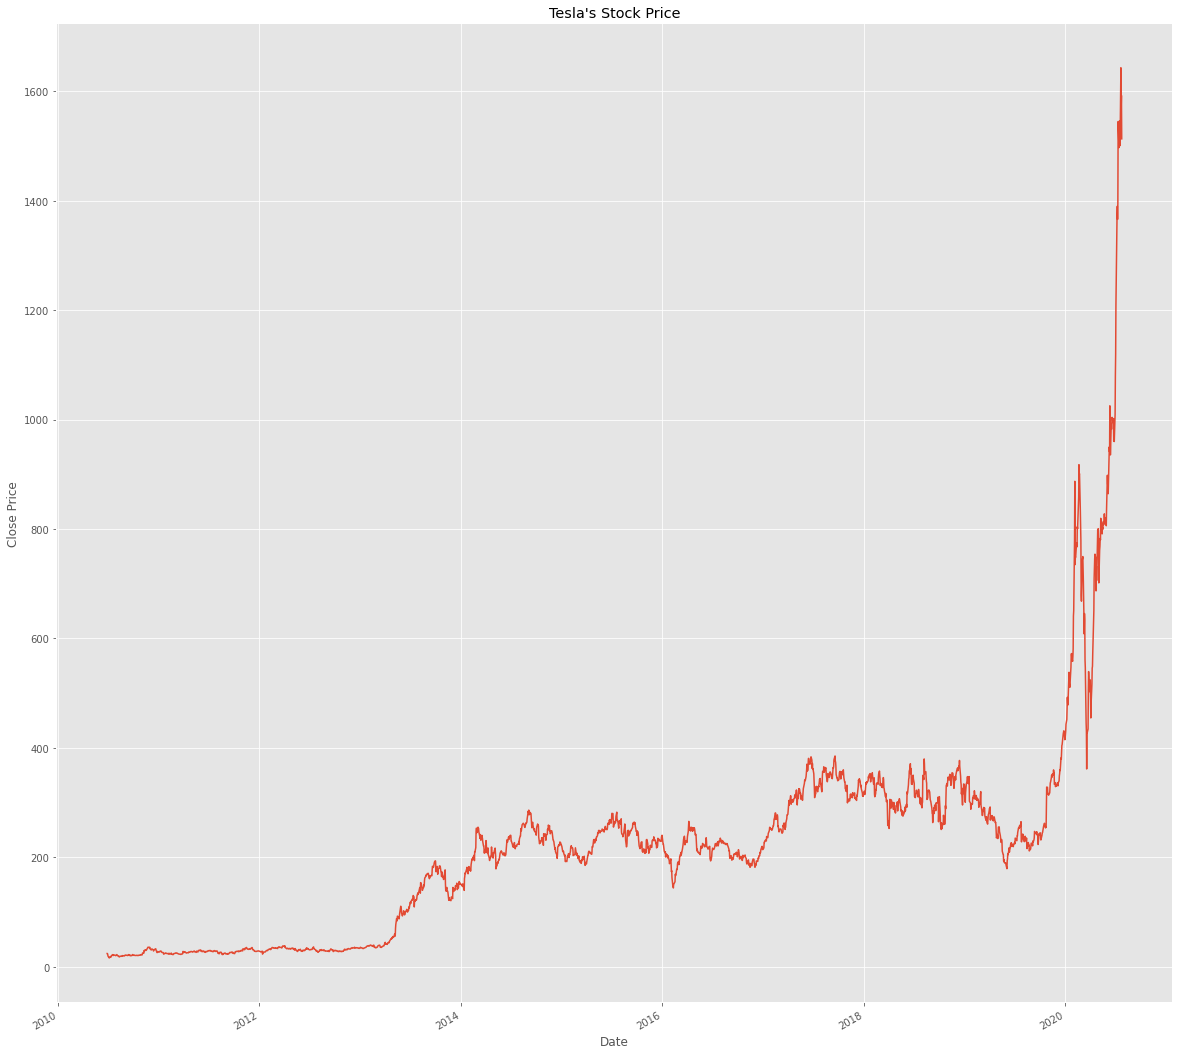

In [14]:
# Visualize the closing prices
figure(figsize=(20,20))

TSLA.Close.plot()
plt.title("Tesla's Stock Price")
plt.ylabel('Close Price'); plt.xlabel('Date')
plt.show()

In [11]:
# Create, and add 100 day moving average to dataframe
TSLA['100ma'] = TSLA['Close'].rolling(window=100, min_periods=0).mean()
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.860000
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.226666
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,22.220000
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,20.998000


No handles with labels found to put in legend.


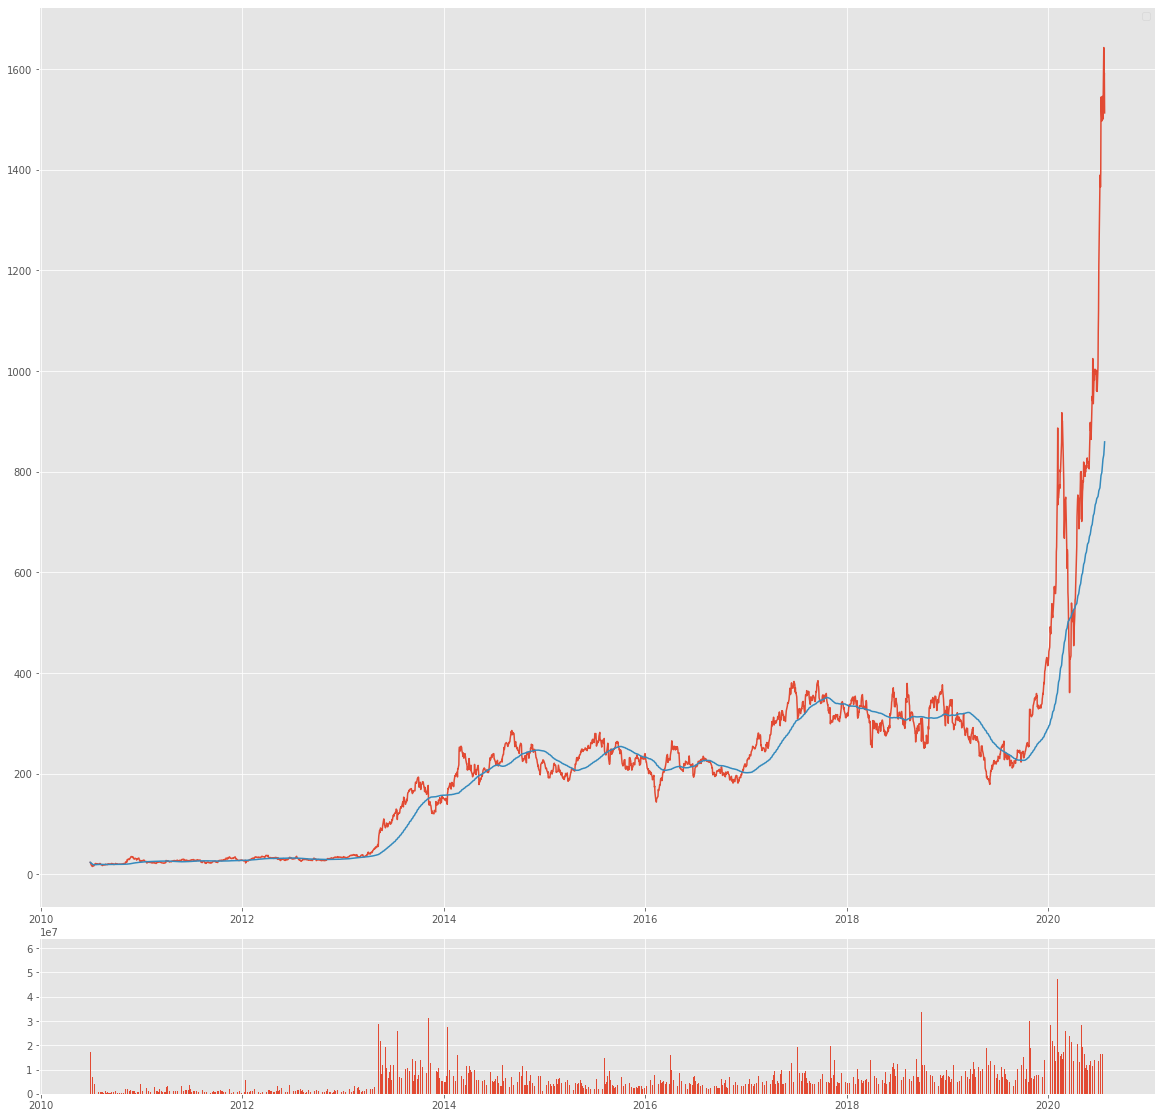

In [13]:
# Visualize the close prices, 100ma, and volume
figure(figsize=(20,20))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(TSLA.index, TSLA.Close)
ax1.plot(TSLA.index, TSLA['100ma'])
ax2.bar(TSLA.index, TSLA.Volume, label='volume')

ax1.legend()
plt.show()

In [ ]:
import bs4 as bs  # Beautiful Soup (web scraping library)
import pickle     # Allows us to save S&P list
import requests

In [ ]:
# Get a list of all S&P 500 tickers
def save_sp500_tickers() :
  resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup = bs.BeautifulSoup(resp.text)
  table = soup.find('table', {'id': 'constituents'})
  tickers = []

  for row in table.findAll('tr')[1:]:
      ticker = row.find_all('td')[0].text.replace('\n','')
      if "." in ticker:
          ticker = ticker.replace('.','-')
          print('ticker replaced to', ticker)
      tickers.append(ticker)

  with open("sp500tickers.pickle","wb") as f:
      pickle.dump(tickers, f)


      return tickers

  

save_sp500_tickers()

In [ ]:
save_sp500_tickers()[:5]    # Print just the first 5 tickers in the table

ticker replaced to BRK-B
ticker replaced to BF-B


['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN']

In [ ]:
import os
import time

In [ ]:
# Download all stock data from the list of S&P 500 tickers
def data_from_yahoo(reload_sp500=False):
  if reload_sp500:
    tickers = save_sp500_tickers()
  else:
    with open("sp500tickers.pickle", "rb") as f:
      tickers = pickle.load(f)
  if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')

  start = dt.datetime(2000,1,1)
  end = dt.datetime(2020,7,24)

  for ticker in tickers:
    print(ticker)
    if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
      df = pdr.get_data_yahoo(ticker, start, end)
      df.to_csv('stock_dfs/{}.csv'.format(ticker))
    else:
      print('Already have {}'.format(ticker))
      
data_from_yahoo()

MMM
[*********************100%***********************]  1 of 1 downloaded
ABT
[*********************100%***********************]  1 of 1 downloaded
ABBV
[*********************100%***********************]  1 of 1 downloaded
ABMD
[*********************100%***********************]  1 of 1 downloaded
ACN
[*********************100%***********************]  1 of 1 downloaded
ATVI
[*********************100%***********************]  1 of 1 downloaded
ADBE
[*********************100%***********************]  1 of 1 downloaded
AMD
[*********************100%***********************]  1 of 1 downloaded
AAP
[*********************100%***********************]  1 of 1 downloaded
AES
[*********************100%***********************]  1 of 1 downloaded
AFL
[*********************100%***********************]  1 of 1 downloaded
A
[*********************100%***********************]  1 of 1 downloaded
APD
[*********************100%***********************]  1 of 1 downloaded
AKAM
[*********************100%*****

In [ ]:
# List of potential missing tickers
missing_tickers = ['ANDV', 'BKNG', 'BHF', 'CBRE', 'DWDP', 'DXC', 'EVRG', 'JEF', 'TPR', 'UAA', 'WELL']

In [ ]:
#Compile all of the downloaded stock data
def compile_data():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
    
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        if ticker in missing_tickers:
            pass
        else:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)

            df.rename(columns = {'Adj Close': ticker}, inplace=True)
            df.drop(['Open','High','Low', 'Close', 'Volume'], 1, inplace=True)

            # Join the DataFrames together
            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')

            if count % 50 == 0:  # Track progress
                print(count)
            
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

In [ ]:
# Show the compiled stock data
compile_data()

0
50
100
150
200
250
300
350
400
450
500
                  MMM       ABT  ABBV      ABMD  ...       ZBRA  ZBH       ZION  ZTS
Date                                             ...                                
2000-01-03  28.311874  9.595666   NaN  18.25000  ...  25.027779  NaN  40.734089  NaN
2000-01-04  27.186905  9.321495   NaN  17.81250  ...  24.666666  NaN  38.761597  NaN
2000-01-05  27.974379  9.304364   NaN  18.00000  ...  25.138889  NaN  38.715733  NaN
2000-01-06  30.224340  9.629930   NaN  18.03125  ...  23.777779  NaN  39.266190  NaN
2000-01-07  30.824324  9.732743   NaN  17.93750  ...  23.513889  NaN  39.357929  NaN

[5 rows x 498 columns]


In [ ]:
# Visualize the stock data as a heatmap where the greener the tickers, the more correlated they are to each other
# A mostly green map makes sense for the S&P 500
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()                                # Obtain correlation data
    data = df_corr.values
    
    # Visualization
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    fig.set_figheight(100)
    fig.set_figwidth(100)

    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

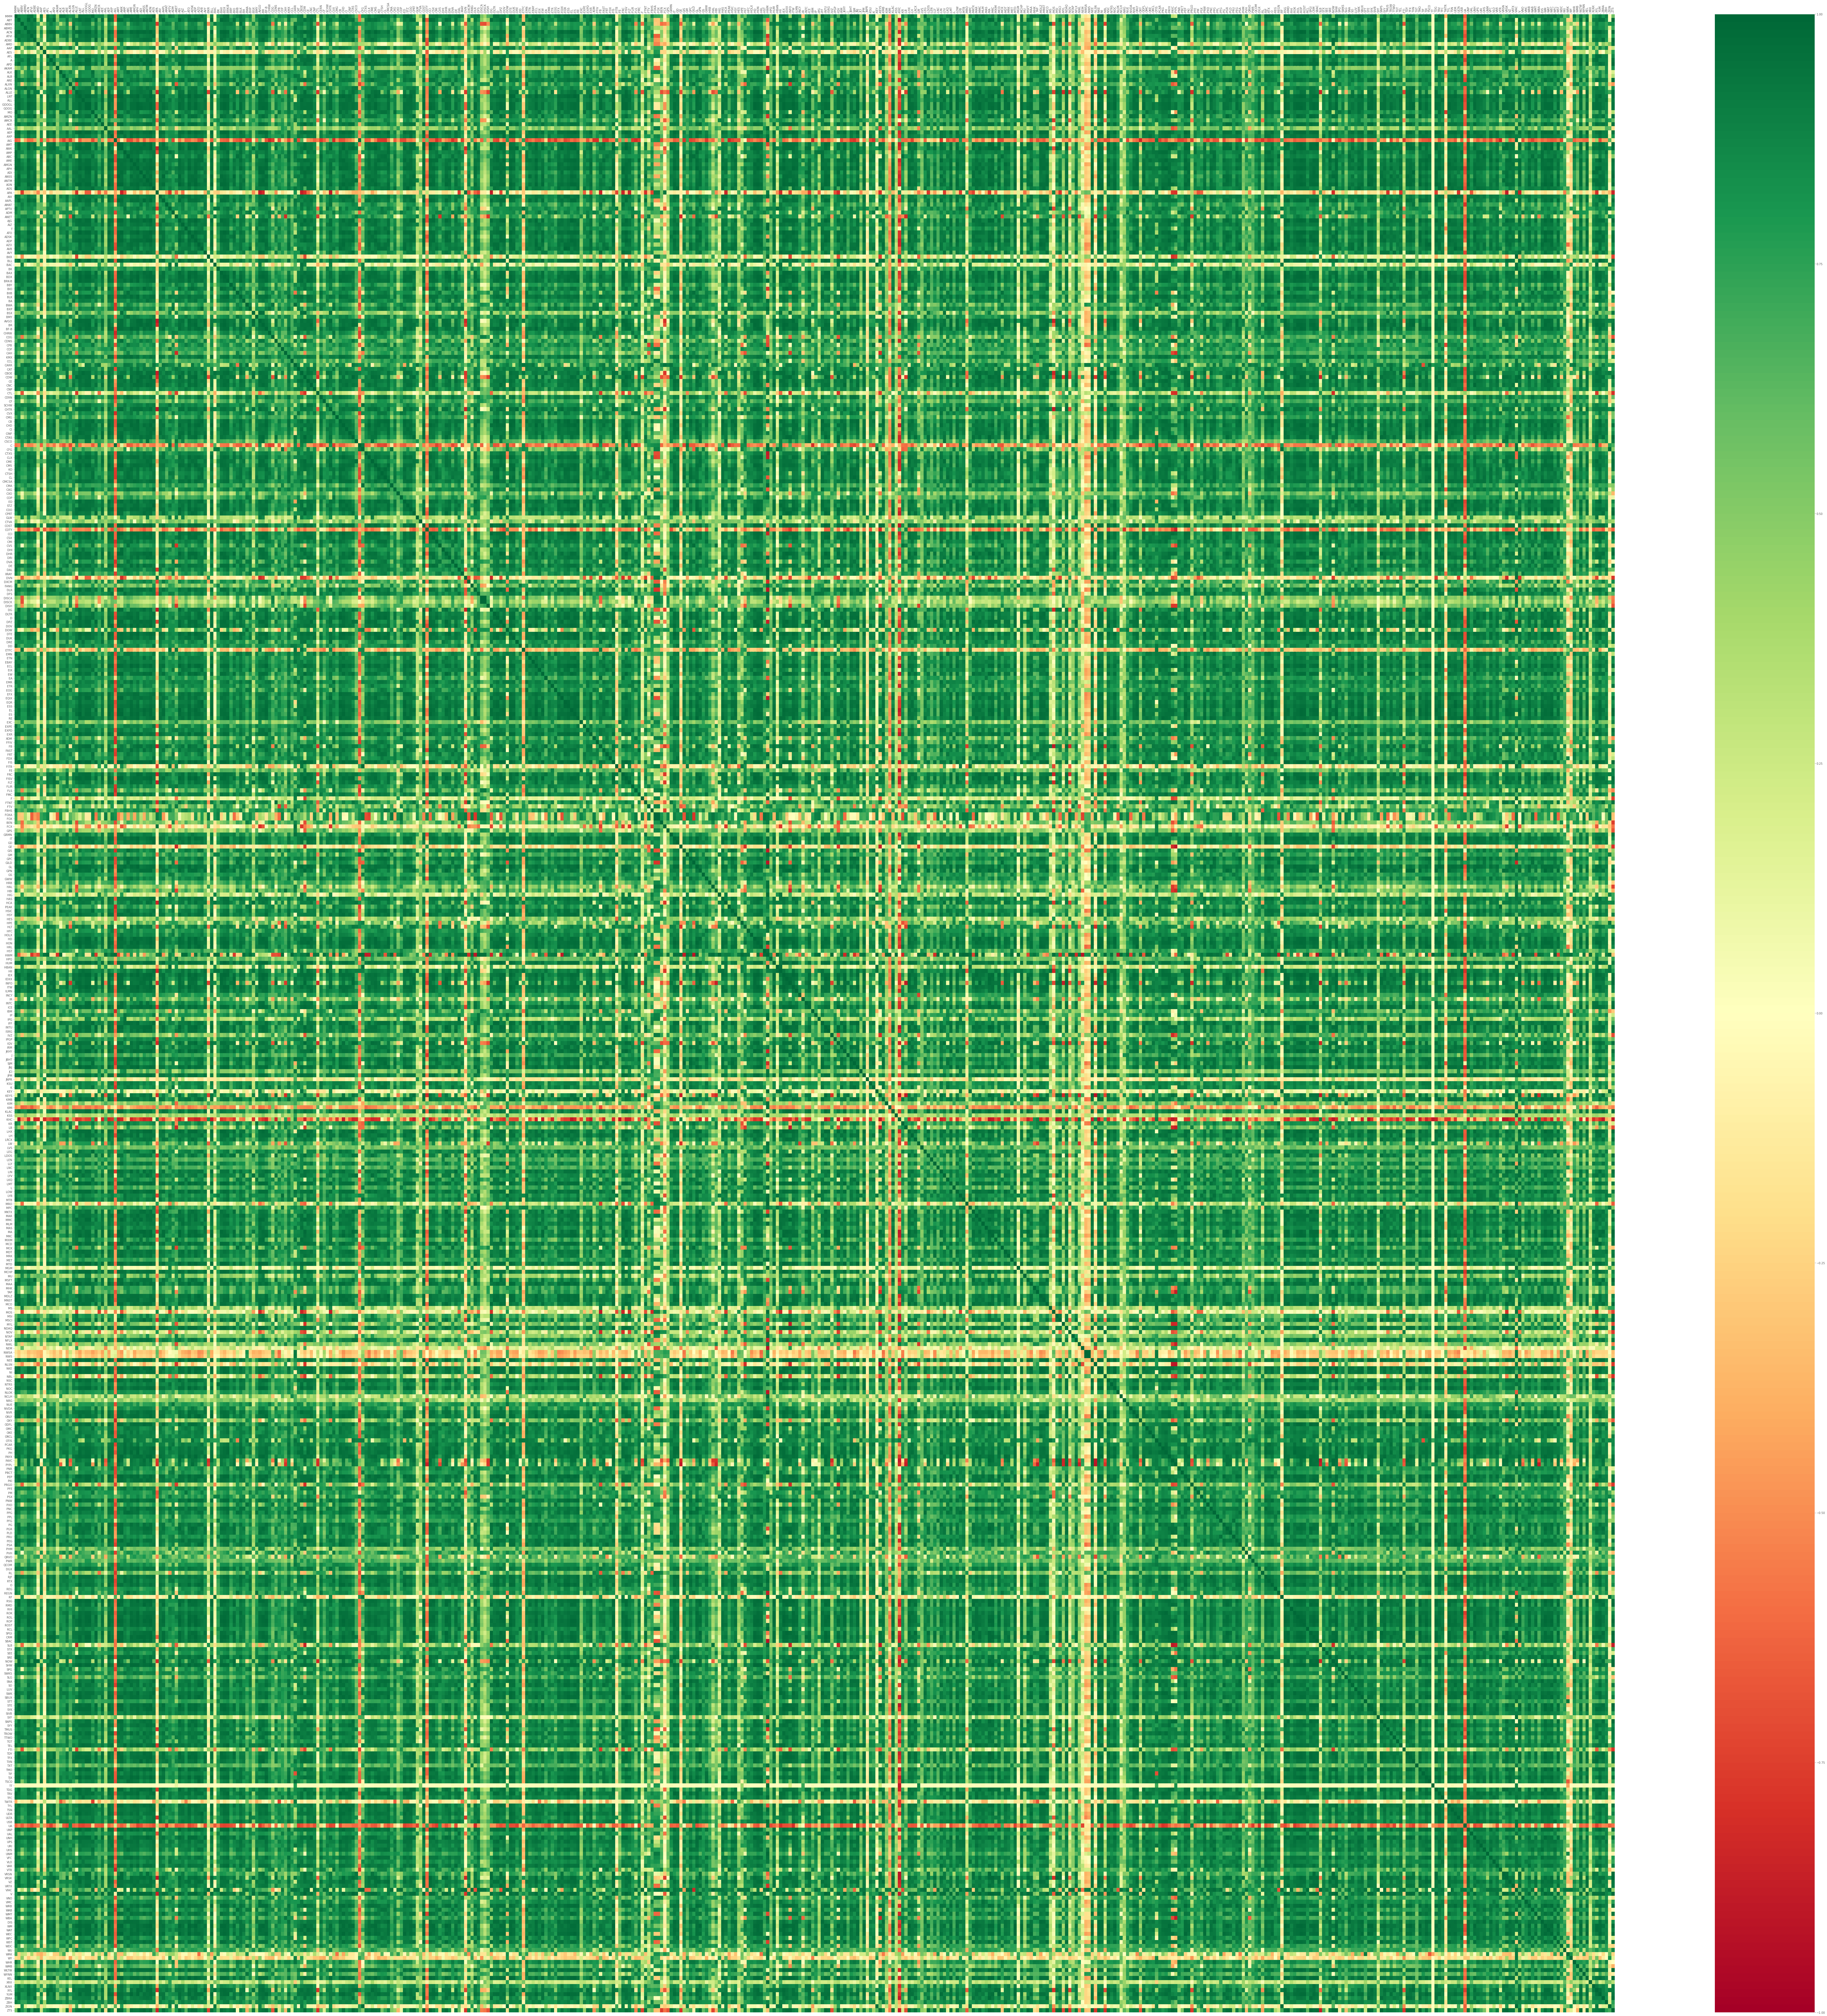

In [ ]:
# Show the heatmap
visualize_data()

In [ ]:
# Process the stock data for labels
def process_data_for_labels(ticker):
    hm_days = 7                       # How many days for price to go up/down X%
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    # Obtain percentage change within given number of days 
    for i in range(1, hm_days+1): 
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
        
    df.fillna(0, inplace=True)
    return tickers, df

In [ ]:
# Create a function to tell when to buy, sell or hold the stock
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02                  # 2% change in share price
    
    # If price goes up 2%
    for col in cols:
        if col > requirement:
            return 1                    # Buy
        if col < -requirement:
            return -1                   # Sell
    return 0                            # Hold

In [ ]:
# Create a function to extract the feature sets
from collections import Counter

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    # Create new column of classes: buy/ sell/ hold 
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)],
                                             ))
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values                         # Features
    y = df['{}_target'.format(ticker)].values  # Target labels
    
    return X, y, df

In [ ]:
# Show the extracted featuresets
extract_featuresets('MMM')

Data spread: Counter({'1': 2006, '-1': 1638, '0': 1528})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03973488, -0.02857238,  0.        , ...,  0.        ,
         -0.04842362,  0.        ],
        [ 0.02896519, -0.0018378 ,  0.        , ...,  0.        ,
         -0.00118323,  0.        ],
        ...,
        [ 0.00914503, -0.00898264, -0.02149888, ...,  0.01415677,
          0.05371649, -0.00657673],
        [ 0.00576682,  0.02036867,  0.00308003, ...,  0.00422544,
         -0.01363376,  0.00068965],
        [ 0.00365438,  0.00628803,  0.00337771, ..., -0.00240433,
          0.02223561, -0.00716694]]),
 array([-1,  1,  1, ...,  0,  0,  0]),
                    MMM         ABT        ABBV  ...    MMM_6d    MMM_7d  MMM_target
 Date                                            ...                                
 2000-01-03   28.311874    9.595666    0.000000  ...  0.064901  0.067550          -1
 2000-01-04   27.186905    9.321495    0.000000  ...  0.111724  0.111724       

In [ ]:
# Import machine learning libraries
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [ ]:
# Create the machine learning function to find the accuracy of the confidence in predicting to buy, sell or hold
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)  # Extract features
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)  
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return confidence

In [ ]:
do_ml('BAC')

Data spread: Counter({'1': 2182, '-1': 1998, '0': 992})
Accuracy 0.37587006960556846
Predicted spread: Counter({1: 511, -1: 396, 0: 386})


0.37587006960556846